In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv('03_03_clientes.csv', delimiter=";")

In [3]:
print(df.head())

   Salario  Gasto
0     1500   0.08
1     1500   0.25
2     1600   0.11
3     1600   0.06
4     1700   0.21


- Agrupamiento jerárquico:
    - Método de aprendizaje no supervisado para agrupar puntos de datos
    - El algoritmo crea grupos midiendo las diferencias entre los datos
    - Funciona de manera "ascendente": comienza tratando cada punto de datos como su propio clúster individual y luego fusiona iterativamente los clústeres más cercanos hasta alcanzar el número deseado de grupos
- Un dendrograma es un tipo de diagrama en forma de árbol que se utiliza comúnmente para visualizar los resultados del análisis de clustering jerárquico (específicamente, el aglomerativo o "ascendente").
    - Su propósito principal es ilustrar la disposición de los clústeres y cómo se fusionaron progresivamente a lo largo del proceso.
    - Permite determinar el número óptimo de clústeres (K): Al buscar "saltos" grandes en el eje Y y cortar el árbol horizontalmente, puedes decidir cuántos grupos naturales existen en los datos.

    

- Desafío: Analizar los clientes de la boutique llamada "El buen gusto". La boutique quiere saber si existen similitudes entre los clientes para poder dividirlos en grupos. 
    1. Crear un dendrograma para decidir el número de clústeres
    2. Crear un modelo de agrupamiento jerárquico aglomerativo de scikit-learn con la cantidad de clústeres que encontró en el punto 1
    3. Encontrar las etiquetas de los puntos
    4. Graficar los grupos

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(df.values)

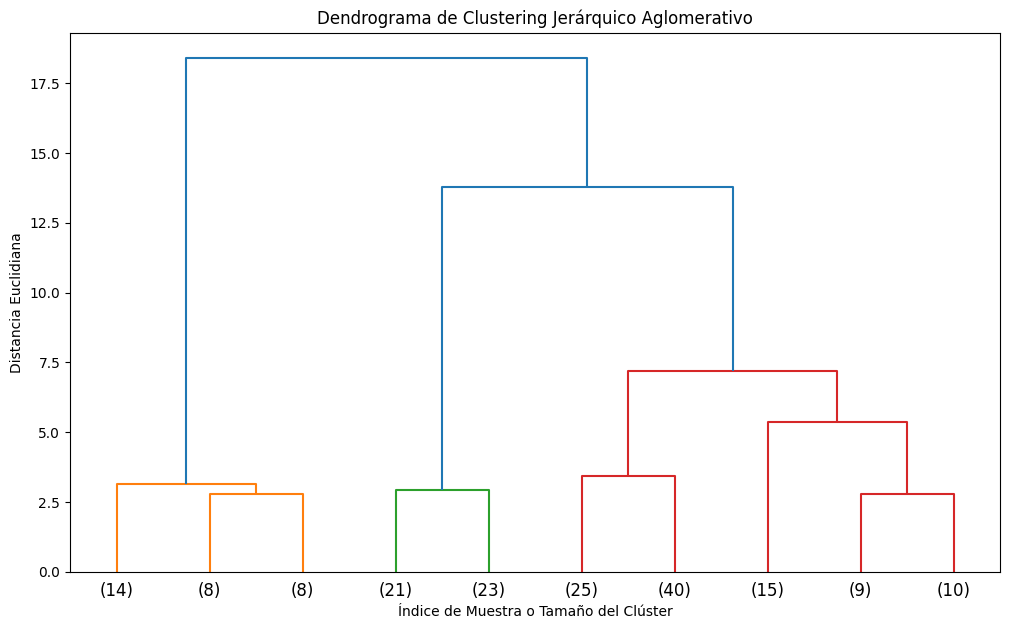

In [5]:
# Calcular la matriz de enlace (linkage matrix)
Z = linkage(X, method='ward', metric='euclidean')

# Graficar el dendrograma
plt.figure(figsize=(12, 7))
plt.title("Dendrograma de Clustering Jerárquico Aglomerativo")
plt.xlabel("Índice de Muestra o Tamaño del Clúster")
plt.ylabel("Distancia Euclidiana")
dendrogram(
    Z,
    truncate_mode='lastp', # Muestra solo los últimos p clústeres fusionados
    p=10,                  # Muestra 10 agrupaciones finales
    show_leaf_counts=True,
)
plt.show()

In [6]:
n_clusters_deseado = 3
ac = AgglomerativeClustering(n_clusters=n_clusters_deseado,
                                     metric='euclidean',
                                     linkage='ward')

etiquetas = ac.fit_predict(X)

In [7]:
etiquetas

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

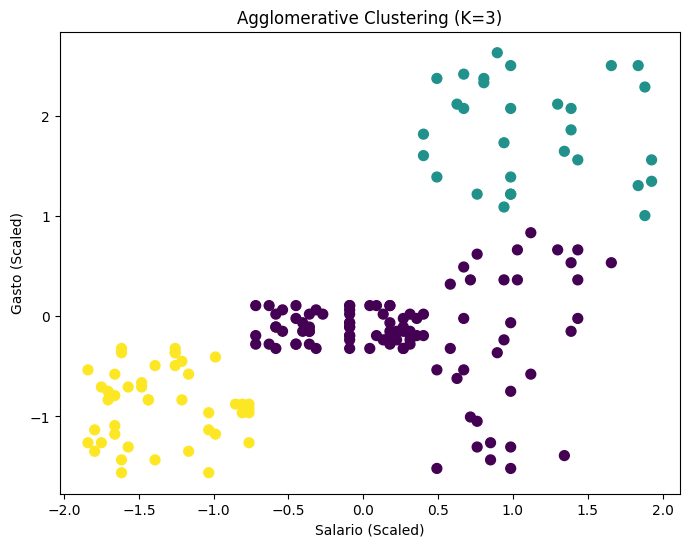

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=etiquetas, cmap='viridis', s=50)
plt.title(f'Agglomerative Clustering (K={n_clusters_deseado})')
plt.xlabel('Salario (Scaled)')
plt.ylabel('Gasto (Scaled)')
plt.show()